In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

#reading the dataset
course_dataset=pd.read_csv('C:/Users/jenis/Downloads/udemy_courses.csv')
course_dataset.shape

(3678, 12)

In [2]:
course_dataset.columns  

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [3]:
course_dataset.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
course_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
#dropping the columns which are not useful for the analysis
course_dataset.drop(['course_id','course_title','url','published_timestamp'],inplace = True, axis = 1)

In [6]:
#checking if there are any columns which contain null values
course_dataset.isnull().sum()

is_paid             0
price               0
num_subscribers     0
num_reviews         0
num_lectures        0
level               0
content_duration    0
subject             0
dtype: int64

In [7]:
course_dataset.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [8]:
#to check the number of categories present in each categorical variable
course_dataset.select_dtypes(['object','bool']).nunique()

is_paid    2
level      4
subject    4
dtype: int64

In [9]:
print("Categories present in 'is_paid' variable:",course_dataset['is_paid'].unique())
print("Categories present in 'level' variable:",course_dataset['level'].unique())
print("Categories present in 'subject' variable:",course_dataset['subject'].unique())

Categories present in 'is_paid' variable: [ True False]
Categories present in 'level' variable: ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
Categories present in 'subject' variable: ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [10]:
course_dataset['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

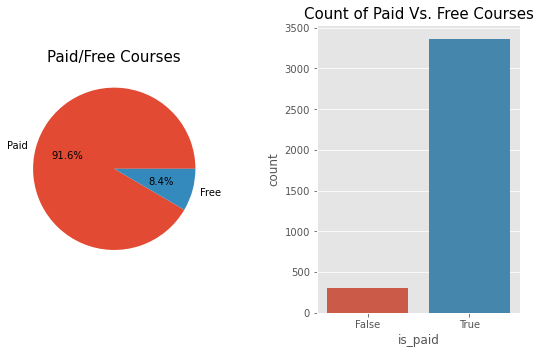

In [11]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Paid/Free Courses',fontsize = 15)
plt.pie(course_dataset['is_paid'].value_counts(),labels=['Paid','Free'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Paid Vs. Free Courses',fontsize = 15)
sns.countplot(course_dataset['is_paid'])

Text(0, 0.5, 'Number of subscribers')

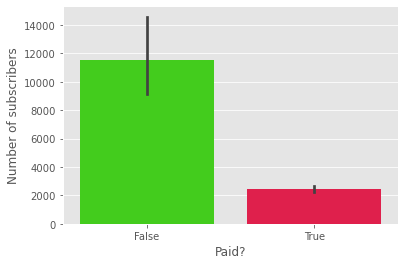

In [12]:
#this displays the number of subscribers for paid vs. free courses:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['is_paid'],palette='prism')
plt.style.use('ggplot')
plt.xlabel('Paid?')
plt.ylabel('Number of subscribers')

In [13]:
course_dataset['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

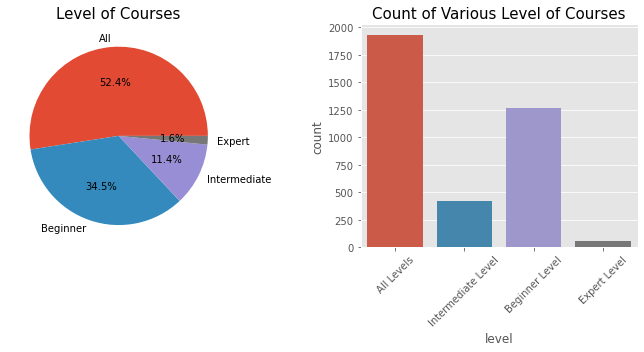

In [14]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Level of Courses',fontsize = 15)
plt.pie(course_dataset['level'].value_counts(),labels=['All','Beginner','Intermediate','Expert'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Various Level of Courses',fontsize = 15)
sns.countplot(course_dataset['level'])
plt.xticks(rotation = 45)
plt.tight_layout()

Text(0, 0.5, 'Number of subscribers')

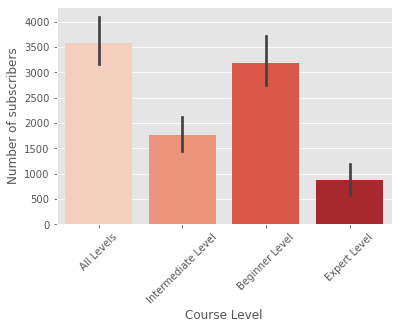

In [15]:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['level'],palette='Reds')
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.xlabel('Course Level')
plt.ylabel('Number of subscribers')

In [16]:
course_dataset['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

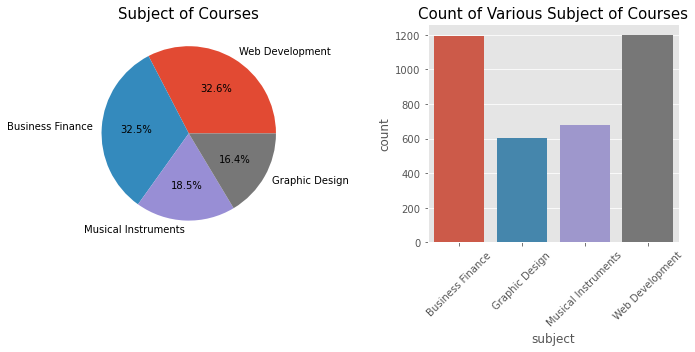

In [17]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)
plt.style.use('ggplot')
plt.subplot(141)
plt.title('Subject of Courses',fontsize = 15)
plt.pie(course_dataset['subject'].value_counts(),labels=['Web Development','Business Finance','Musical Instruments','Graphic Design'],autopct="%1.1f%%")

plt.subplot(142)
plt.title('Count of Various Subject of Courses',fontsize = 15)
sns.countplot(course_dataset['subject'])
plt.xticks(rotation = 45)
plt.tight_layout()

Text(0, 0.5, 'Number of subscribers')

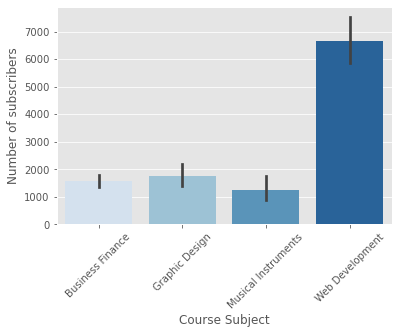

In [18]:
sns.barplot(y=course_dataset['num_subscribers'],x=course_dataset['subject'],palette='Blues')
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.xlabel('Course Subject')
plt.ylabel('Number of subscribers')

Text(0.5, 1.0, 'Distribution of Number of Subscribers')

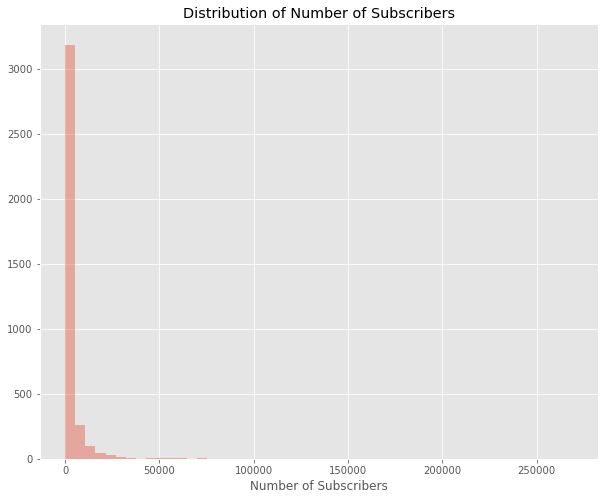

In [19]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(course_dataset['num_subscribers'],kde=False)
plt.xlabel('Number of Subscribers')
plt.title('Distribution of Number of Subscribers')

Text(0.5, 1.0, 'Box-plot representing the distribution of number of subscribers')

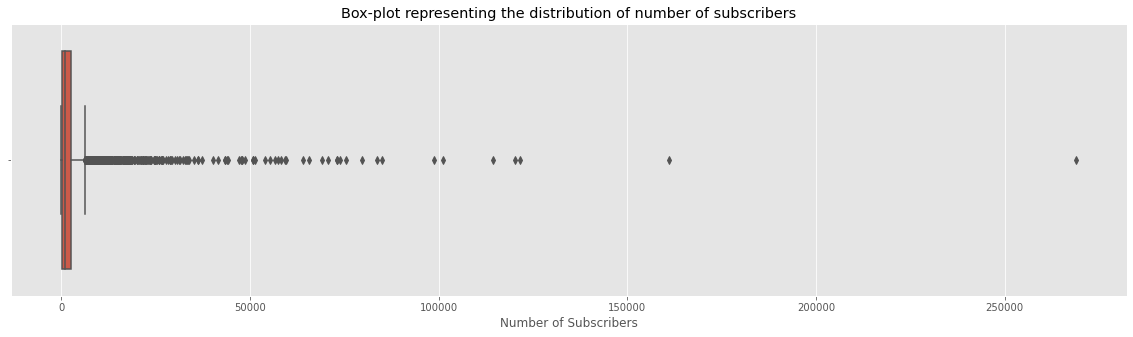

In [20]:
plt.figure(figsize=(20,5))
plt.style.use('ggplot')
sns.boxplot(course_dataset['num_subscribers'])
plt.xlabel('Number of Subscribers')
plt.title('Box-plot representing the distribution of number of subscribers')

Text(0.5, 1.0, 'Normal distribution of the number of subscribers')

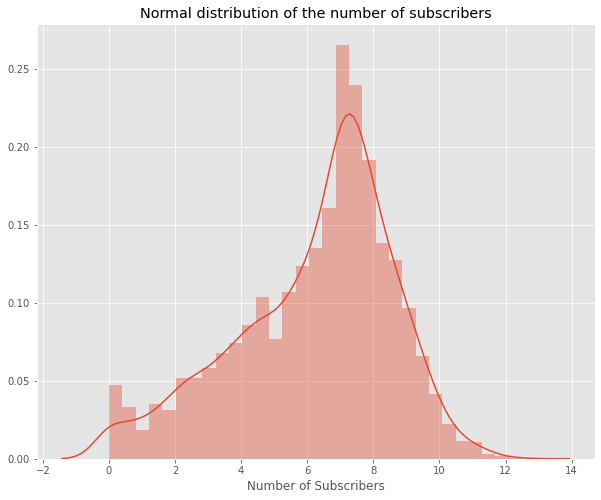

In [21]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(np.log(course_dataset['num_subscribers']+1))
plt.xlabel('Number of Subscribers')
plt.title('Normal distribution of the number of subscribers')

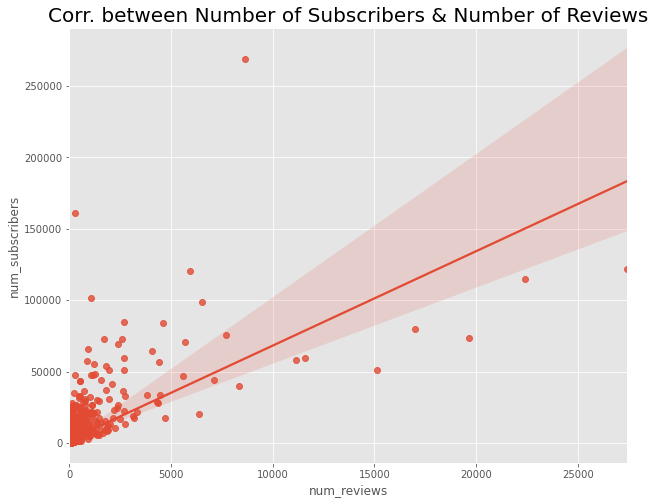

In [22]:
#this displays the Corr. between Number of Subscribers & Number of Reviews
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers & Number of Reviews',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['num_reviews'])

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

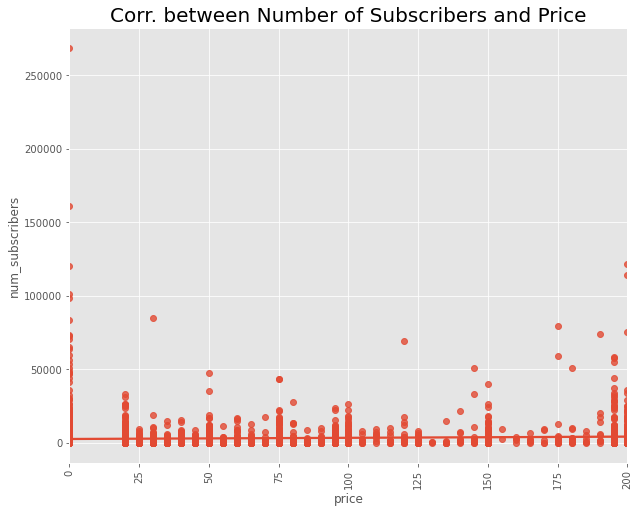

In [23]:
#this displays the Corr. between Number of Subscribers & price
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers and Price',fontsize = 20)
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['price'])
plt.style.use('ggplot')
plt.xticks(rotation = 90)

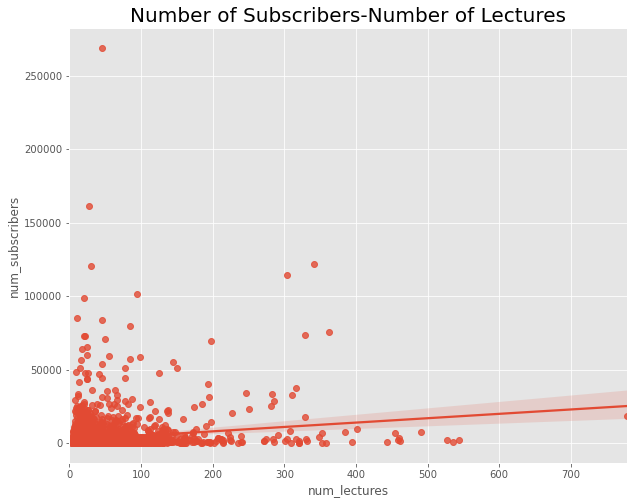

In [24]:
#this displays the Corr. between Number of Subscribers & number of lectures
plt.figure(figsize=(10,8))
plt.title('Number of Subscribers-Number of Lectures',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['num_lectures'])

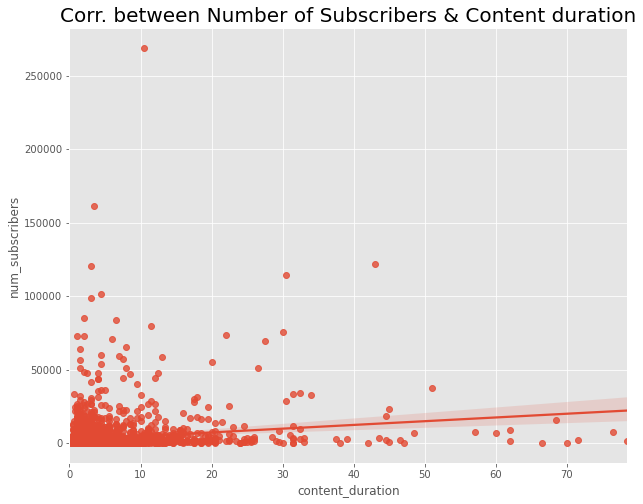

In [25]:
#this displays the Corr. between Number of Subscribers & content duration
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers & Content duration',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=course_dataset['num_subscribers'],x=course_dataset['content_duration'])

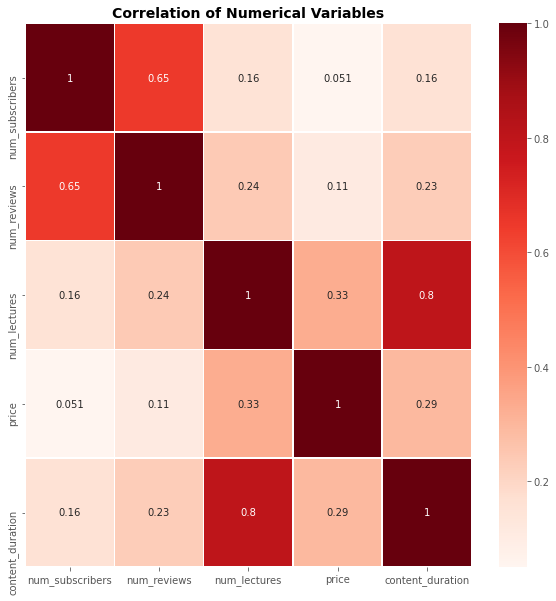

In [26]:
features=course_dataset[['num_subscribers','num_reviews','num_lectures','price','content_duration']]
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), linewidths=.5, annot=True, cmap='Reds', cbar=True)
plt.title('Correlation of Numerical Variables', fontsize=14, weight='bold')
plt.style.use('ggplot')
plt.show()

In [27]:
#replacing the 'True' with 1 and the 'False' with 0 in the 'is_paid' variable 
course_dataset['is_paid']=course_dataset['is_paid'].replace({True:1,False:0})

In [28]:
#label encoding the 'level' and 'subject' columns
lb = LabelEncoder()
X_level = course_dataset['level']
X_subject = course_dataset['subject']
course_dataset['level']=lb.fit_transform(X_level)
course_dataset['subject']=lb.fit_transform(X_subject)

In [29]:
#dataset after all the transformation of the categorical columns
course_dataset.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1,200,2147,23,51,0,1.5,0
1,1,75,2792,923,274,0,39.0,0
2,1,45,2174,74,51,3,2.5,0
3,1,95,2451,11,36,0,3.0,0
4,1,200,1276,45,26,3,2.0,0


In [30]:
X=course_dataset[['is_paid','num_reviews','level','content_duration','subject']]

In [31]:
#target 
y=course_dataset['num_subscribers']

In [32]:
#splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [33]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [34]:
#using a Random Forest model for predicting the number of subscribers 
model=RandomForestClassifier()

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred=model.predict(X_test)

In [40]:
#using mean square error to evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mae= mean_squared_error(y_test,y_pred)
mae

34532038.45326087